In [1]:
from ml4cvd.arguments import _get_tmap
import h5py
import numpy as np
from ml4cvd.tensor_from_file import _mri_hd5_to_structured_grids
import h5py
import time
import matplotlib.pyplot as plt
import os
import sys

/usr/local/lib/python3.6/dist-packages/apache_beam/__init__.py:84: UserWarning: Running the Apache Beam SDK on Python 3 is not yet fully supported. You may encounter buggy behavior or missing features.
  'Running the Apache Beam SDK on Python 3 is not yet fully supported. '
Using TensorFlow backend.


In [2]:
USER = 'pdiachil'
HOME_PATH = '/home/'+USER

In [ ]:
with h5py.File(f'{HOME_PATH}/mri_tensors/2000119.hd5', 'r') as hd5:
    cine_sax= _mri_hd5_to_structured_grids(hd5, 'cine_segmented_sax_inlinevf', save_path=f'{HOME_PATH}/mri_tensors')
    cine_sax= _mri_hd5_to_structured_grids(hd5, 'cine_segmented_sax_inlinevf_segmented', save_path=f'{HOME_PATH}/mri_tensors')
    cine_lax= _mri_hd5_to_structured_grids(hd5, 'cine_segmented_lax_inlinevf_segmented', save_path=f'{HOME_PATH}/mri_tensors')
    lax_2ch = _mri_hd5_to_structured_grids(hd5, 'cine_segmented_lax_2ch', save_path=f'{HOME_PATH}/mri_tensors')
    lax_3ch = _mri_hd5_to_structured_grids(hd5, 'cine_segmented_lax_3ch', save_path=f'{HOME_PATH}/mri_tensors')
    lax_4ch = _mri_hd5_to_structured_grids(hd5, 'cine_segmented_lax_4ch', save_path=f'{HOME_PATH}/mri_tensors')

126.09429001808167


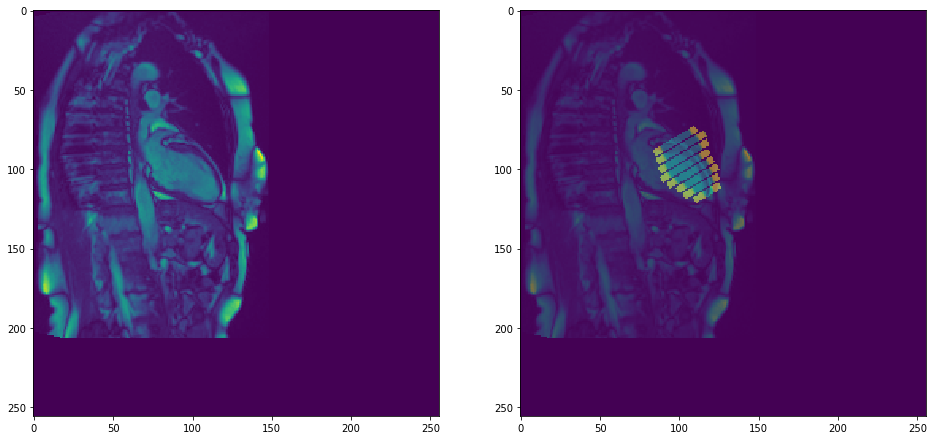

In [6]:
%matplotlib inline
for series in ['2ch']:
    start_time = time.time()
    tm = _get_tmap(f'cine_segmented_lax_{series}')
    tm_segmented = _get_tmap(f'cine_segmented_lax_{series}_proj_from_sax')
    with h5py.File(f'{HOME_PATH}/mri_tensors/2000119.hd5', 'r') as hd5:
        slices = tm.tensor_from_file(tm, hd5)
        slices_segmented = tm_segmented.tensor_from_file(tm_segmented, hd5)
    end_time = time.time()
    print(end_time - start_time)
    f, ax = plt.subplots(1, 2)
    f.set_size_inches(16, 9)
    ax[0].imshow(slices[:, :, 0])
    ax[1].imshow(slices[:, :, 0])
    ax[1].imshow(slices_segmented[:, :, 0], alpha=0.5)

In [ ]:
%matplotlib inline
import time
from ml4cvd.tensor_from_file import _mri_tensor_4d
tm_segmented = _get_tmap(f'cine_segmented_sax_inlinevf_proj_from_lax')
with h5py.File(f'{HOME_PATH}/mri_tensors/2000119.hd5', 'r') as hd5:
    start_time = time.time()
    slices = _mri_tensor_4d(hd5, 'cine_segmented_sax_inlinevf')
    slices_segmented = tm_segmented.tensor_from_file(tm_segmented, hd5)
    end_time = time.time()
    print(end_time - start_time)
    f, ax = plt.subplots(1, 2)
    f.set_size_inches(16, 9)
    ax[0].imshow(slices[:, :, 0, 0])
    ax[1].imshow(slices[:, :, 0, 0])
    ax[1].imshow(slices_segmented[:, :, 0], alpha=0.5)

# Add position, orientation, width, height, and thickness tensors to HD5
HD5 tensors are saved in {HOME_PATH}

In [ ]:
from ml4cvd.arguments import parse_args
from ml4cvd.recipes import run
sys.argv = ['tensorize',
            '--mode', 'tensorize',
            '--zip_folder', '/mnt/disks/sax-and-lax-zip-2019-09-30/',
            '--xml_folder', '/mnt/disks/ecg-rest-xml-36k/',
            '--output_folder', f'{HOME_PATH}/mri_tensors/',
            '--tensors', f'{HOME_PATH}/mri_tensors/',
            '--mri_field_ids', '20208', '20209', 
            '--xml_field_ids', 
            '--min_sample_id', '2000000', 
            '--max_sample_id', '2005000'
           ]
args = parse_args()
run(args)

# Extract cine_segmented tensors from HD5 for SAX and LAX

In [ ]:
with h5py.File(f'{HOME_PATH}/mri_tensors/2000119.hd5', 'r') as hd5:
    nslices = int(len(hd5['cine_segmented_sax_inlinevf'])/50)
    t = 0
    s = 0    
    cine_arr = np.zeros((256, 256, nslices, 50))
    cine_arr_segmented = np.zeros((256, 256, nslices, 50))
    
    for k in sorted(hd5['cine_segmented_sax_inlinevf'], key=int):
        cine_arr[:, :, s, t] = hd5['cine_segmented_sax_inlinevf'][k][()].T
        cine_arr_segmented[:, :, s, t] = hd5['cine_segmented_sax_inlinevf_segmented'][k][()].T
        t += 1
        if t == 50:
            s += 1
            t = 0
    cine_arr_position = hd5['mri_patient_position_cine_segmented_sax_inlinevf'][k][()]
    cine_arr_orientation = hd5['mri_patient_orientation_cine_segmented_sax_inlinevf_segmented'][k][()]
    cine_arr_width = hd5['mri_pixel_width_cine_segmented_sax_inlinevf'][()]
    cine_arr_height = hd5['mri_pixel_height_cine_segmented_sax_inlinevf'][()]
    cine_arr_thickness = hd5['mri_slice_thickness_cine_segmented_sax_inlinevf'][()]

In [ ]:
from ml4cvd.tensor_from_file import _mri_tensor_4d
%matplotlib inline
f, ax = plt.subplots()
ax.imshow(cine_arr[:, :, 0, 0])
ax.imshow(cine_arr_segmented[:, :, 0, 0], alpha=0.5)

In [ ]:
with h5py.File(f'{HOME_PATH}/mri_tensors/2000119.hd5', 'r') as hd5:
    nslices = int(len(hd5['cine_segmented_lax_inlinevf'])/50)
    t = 0
    s = 0    
    cine_arr_lax = np.zeros((256, 256, nslices, 50))
    cine_arr_lax_segmented = np.zeros((256, 256, nslices, 50))
    cine_arr_lax_positions = np.zeros((3, nslices))
    cine_arr_lax_orientations = np.zeros((6, nslices))
    for k in sorted(hd5['cine_segmented_lax_inlinevf'], key=int):
        cine_arr_lax[:, :, s, t] = hd5['cine_segmented_lax_inlinevf'][k][()].T
        cine_arr_lax_segmented[:, :, s, t] = hd5['cine_segmented_lax_inlinevf_segmented'][k][()].T
        t += 1
        if t == 50:
            s += 1
            t = 0
            cine_arr_lax_positions[:, s-1] = hd5['mri_patient_position_cine_segmented_lax_inlinevf'][k][()]
            cine_arr_lax_orientations[:, s-1] = hd5['mri_patient_orientation_cine_segmented_lax_inlinevf'][k][()]
    cine_arr_width = hd5['mri_pixel_width_cine_segmented_lax_inlinevf'][()]
    cine_arr_height = hd5['mri_pixel_height_cine_segmented_lax_inlinevf'][()]
    cine_arr_thickness = hd5['mri_slice_thickness_cine_segmented_lax_inlinevf'][()]

In [ ]:
from ml4cvd.tensor_from_file import _mri_tensor_4d
%matplotlib inline
f, ax = plt.subplots()
ax.imshow(cine_arr_lax[:, :, 0, 0])
ax.imshow(cine_arr_lax_segmented[:, :, 0, 0], alpha=0.5)

In [ ]:
lax_names = ['lax_2ch', 'lax_3ch', 'lax_4ch']
lax_arrs = []
lax_positions = []
lax_orientations = []
lax_widths = []
lax_heights = []
lax_thicknesses = []
with h5py.File(f'{HOME_PATH}/mri_tensors/2000119.hd5', 'r') as hd5:
    for lax_name in lax_names:
        lax_arrs.append(np.zeros((256, 256, 50)))
        for t in range(50):
            lax_arrs[-1][:, :, t] = hd5[f'cine_segmented_{lax_name}'][()][:, :, t].T
        lax_positions.append(hd5[f'mri_patient_position_cine_segmented_{lax_name}'][()])
        lax_orientations.append(hd5[f'mri_patient_orientation_cine_segmented_{lax_name}'][()])
        lax_widths.append(hd5[f'mri_pixel_width_cine_segmented_{lax_name}'][()])
        lax_heights.append(hd5[f'mri_pixel_height_cine_segmented_{lax_name}'][()])
        lax_thicknesses.append(hd5[f'mri_slice_thickness_cine_segmented_{lax_name}'][()])

# Use orientation and position DICOM tags to move all cine views in the same reference system

VTK structured grid files (\*.vts) prior to transformation (image_\*) and after transformation (structured_grid_\*) are saved in {HOME_PATH}/mri_tensors
- short axis


In [ ]:
import vtk
from vtk.util import numpy_support as ns

images = []
images_transformed = []
images_segmented = []
images_segmented_transformed = []

transforms = []
cine_arr_vtk = []
cine_arr_segmented_vtk = []

Xcoors = np.arange(256)
Ycoors = np.arange(256)
Zcoors = np.arange(nslices)
XYZ = np.meshgrid(Xcoors, Ycoors, Zcoors)
XYZ_arr = np.zeros((256*256*nslices, 3))
XYZ_arr[:, 0] = XYZ[0].ravel(order='F')
XYZ_arr[:, 1] = XYZ[1].ravel(order='F')
XYZ_arr[:, 2] = XYZ[2].ravel(order='F')
XYZ_arr_vtk = ns.numpy_to_vtk(XYZ_arr)

pts = vtk.vtkPoints()
pts.SetData(XYZ_arr_vtk)


grid_writer = vtk.vtkXMLStructuredGridWriter()
for t in range(50):
    images.append(vtk.vtkStructuredGrid())
    images_segmented.append(vtk.vtkStructuredGrid()) 
    images_transformed.append(vtk.vtkStructuredGrid())
    images_segmented_transformed.append(vtk.vtkStructuredGrid())
    cine_arr_vtk.append(ns.numpy_to_vtk(cine_arr[:, :, :, t].ravel(order='F'), deep=True))
    cine_arr_segmented_vtk.append(ns.numpy_to_vtk(cine_arr_segmented[:, :, :, t].ravel(order='F'), deep=True, array_type=vtk.VTK_UNSIGNED_CHAR))
    images[-1].SetDimensions(256, 256, nslices)
    images[-1].SetPoints(pts)
    images[-1].SetExtent(0, 255, 0, 255, 0, nslices-1)    
    images[-1].GetPointData().SetScalars(cine_arr_vtk[-1])
    images_segmented[-1].SetDimensions(256, 256, nslices)
    images_segmented[-1].SetPoints(pts)
    images_segmented[-1].SetExtent(0, 255, 0, 255, 0, nslices-1) 
    images_segmented[-1].GetPointData().SetScalars(cine_arr_segmented_vtk[-1])
    transform = vtk.vtkTransform()
    n_orientation = np.cross(cine_arr_orientation[[3, 4, 5]], cine_arr_orientation[[0, 1, 2]])
    k_orientation = n_orientation*cine_arr_thickness
    transform.SetMatrix([cine_arr_orientation[3]*cine_arr_height, cine_arr_orientation[0]*cine_arr_width, k_orientation[0], cine_arr_position[0],
                         cine_arr_orientation[4]*cine_arr_height, cine_arr_orientation[1]*cine_arr_width, k_orientation[1], cine_arr_position[1], 
                         cine_arr_orientation[5]*cine_arr_height, cine_arr_orientation[2]*cine_arr_width, k_orientation[2], cine_arr_position[2],
                         0, 0, 0, 1])
    transform_filter = vtk.vtkTransformFilter()
    transform_filter.SetInputData(images[-1])
    transform_filter.SetTransform(transform)
    transform_filter.Update()
    images_transformed[-1].DeepCopy(transform_filter.GetOutput())
    
    transform_filter = vtk.vtkTransformFilter()
    transform_filter.SetInputData(images_segmented[-1])
    transform_filter.SetTransform(transform)
    transform_filter.Update()
    images_segmented_transformed[-1].DeepCopy(transform_filter.GetOutput())
    #images[-1].SetSpacing(1.0, 1.0, 1.0)
    #images[-1].SetOrigin(0.0, 0.0, 0.0)
    grid_writer.SetFileName(f'{HOME_PATH}/mri_tensors/image_{t}.vts')
    grid_writer.SetInputData(images[-1])
    grid_writer.Update()
    grid_writer.SetFileName(f'{HOME_PATH}/mri_tensors/image_segmented_{t}.vts')
    grid_writer.SetInputData(images_segmented[-1])
    grid_writer.Update()
    grid_writer.SetFileName(f'{HOME_PATH}/mri_tensors/structured_grid_{t}.vts')
    grid_writer.SetInputData(images_transformed[-1])
    grid_writer.Update()    
    grid_writer.SetFileName(f'{HOME_PATH}/mri_tensors/structured_grid_segmented_{t}.vts')
    grid_writer.SetInputData(images_segmented_transformed[-1])
    grid_writer.Update()

- long axis (2ch, 3ch, and 4ch)

In [ ]:
images_lax = []
images_lax_transformed = []
lax_arr_vtk = []
XYZ_lax = np.meshgrid(Xcoors, Ycoors, [0.0])
XYZ_lax_arr = np.zeros((256*256, 3))
XYZ_lax_arr[:, 0] = XYZ_lax[0].ravel(order='F')
XYZ_lax_arr[:, 1] = XYZ_lax[1].ravel(order='F')
XYZ_lax_arr[:, 2] = XYZ_lax[2].ravel(order='F')
XYZ_lax_arr_vtk = ns.numpy_to_vtk(XYZ_lax_arr)
pts_lax = vtk.vtkPoints()
pts_lax.SetData(XYZ_lax_arr_vtk)

for i, lax_name in enumerate(lax_names):
    images_lax.append([])
    images_lax_transformed.append([])
    lax_arr_vtk.append([])
    for t in range(50):        
        images_lax[-1].append(vtk.vtkStructuredGrid())
        images_lax_transformed[-1].append(vtk.vtkStructuredGrid())
        lax_arr_vtk[-1].append(ns.numpy_to_vtk(lax_arrs[i][:, :, t].ravel(order='F'), deep=True, array_type=vtk.VTK_UNSIGNED_CHAR))
        images_lax[-1][-1].SetDimensions(256, 256, 1)
        images_lax[-1][-1].SetPoints(pts_lax)
        images_lax[-1][-1].SetExtent(0, 255, 0, 255, 0, 0)
        images_lax[-1][-1].GetPointData().SetScalars(lax_arr_vtk[-1][-1])
    
        
        n_orientation = np.cross(lax_orientations[i][[3, 4, 5]], lax_orientations[i][[0, 1, 2]])
        k_orientation = n_orientation*lax_thicknesses[i]
        transform.SetMatrix([lax_orientations[i][3]*lax_heights[i], lax_orientations[i][0]*lax_widths[i], k_orientation[0], lax_positions[i][0],
                             lax_orientations[i][4]*lax_heights[i], lax_orientations[i][1]*lax_widths[i], k_orientation[1], lax_positions[i][1], 
                             lax_orientations[i][5]*lax_heights[i], lax_orientations[i][2]*lax_widths[i], k_orientation[2], lax_positions[i][2],
                             0, 0, 0, 1])
        transform_filter.SetInputData(images_lax[-1][-1])
        transform_filter.SetTransform(transform)
        transform_filter.Update()
        images_lax_transformed[-1][-1].DeepCopy(transform_filter.GetOutput())
        grid_writer.SetFileName(f'{HOME_PATH}/mri_tensors/image_{lax_name}_{t}.vts')
        grid_writer.SetInputData(images_lax[-1][-1])
        grid_writer.Update()
        grid_writer.SetFileName(f'{HOME_PATH}/mri_tensors/structured_grid_{lax_name}_{t}.vts')
        grid_writer.SetInputData(images_lax_transformed[-1][-1])
        grid_writer.Update()

# Test new TMAPs and functions in tensor_from_file
Save aligned SAX and LAX VTK structured grids in {HOME_PATH}/mri_tensors/grid*

In [ ]:
with h5py.File(f'{HOME_PATH}/mri_tensors/2000119.hd5', 'r') as hd5:
    cine_sax= _mri_hd5_to_structured_grids(hd5, 'cine_segmented_sax_inlinevf', save_path=f'{HOME_PATH}/mri_tensors')
    cine_sax= _mri_hd5_to_structured_grids(hd5, 'cine_segmented_sax_inlinevf_segmented', save_path=f'{HOME_PATH}/mri_tensors')
    cine_lax= _mri_hd5_to_structured_grids(hd5, 'cine_segmented_lax_inlinevf_segmented', save_path=f'{HOME_PATH}/mri_tensors')
    lax_2ch = _mri_hd5_to_structured_grids(hd5, 'cine_segmented_lax_2ch', save_path=f'{HOME_PATH}/mri_tensors')
    lax_3ch = _mri_hd5_to_structured_grids(hd5, 'cine_segmented_lax_3ch', save_path=f'{HOME_PATH}/mri_tensors')
    lax_4ch = _mri_hd5_to_structured_grids(hd5, 'cine_segmented_lax_4ch', save_path=f'{HOME_PATH}/mri_tensors')

Test new TMAPs for projecting SAX segmentation to LAX (note: this takes ~2 mins per LAX series)

In [ ]:
%matplotlib inline
for series in ['2ch', '3ch', '4ch']:
    start_time = time.time()
    tm = _get_tmap(f'cine_segmented_lax_{series}')
    tm_segmented = _get_tmap(f'cine_segmented_lax_{series}_proj_from_sax')
    with h5py.File(f'{HOME_PATH}/mri_tensors/2000119.hd5', 'r') as hd5:
        slices = tm.tensor_from_file(tm, hd5)
        slices_segmented = tm_segmented.tensor_from_file(tm_segmented, hd5)
    end_time = time.time()
    print(end_time - start_time)
    f, ax = plt.subplots(1, 2)
    f.set_size_inches(16, 9)
    ax[0].imshow(slices[:, :, 0])
    ax[1].imshow(slices[:, :, 0])
    ax[1].imshow(slices_segmented[:, :, 0], alpha=0.5)

Dummy test of new TMAPs to projecting LAX segmentation onto LAX

In [ ]:
import time
from ml4cvd.tensor_from_file import _mri_tensor_4d
tm_segmented = _get_tmap(f'cine_segmented_lax_2ch_proj_from_lax')
with h5py.File(f'{HOME_PATH}/mri_tensors/2000119.hd5', 'r') as hd5:
    start_time = time.time()
    slices = _mri_tensor_4d(hd5, 'cine_segmented_lax_2ch')
    slices_segmented = tm_segmented.tensor_from_file(tm_segmented, hd5)
    end_time = time.time()
    print(end_time - start_time)
    f, ax = plt.subplots(1, 2)
    f.set_size_inches(16, 9)
    ax[0].imshow(slices[:, :, 0, 0])
    ax[1].imshow(slices[:, :, 0, 0])
    ax[1].imshow(slices_segmented[:, :, 0], alpha=0.5)

# Test orientation and position TMAPS

In [ ]:
for series in ['lax_2ch', 'lax_3ch', 'lax_4ch', 'sax_b1', 'sax_inlinevf']:
    tm_orientation = _get_tmap(f'mri_patient_orientation_cine_segmented_{series}')
    tm_position = _get_tmap(f'mri_patient_position_cine_segmented_{series}')
    with h5py.File(f'{HOME_PATH}/mri_tensors/2004480.hd5', 'r') as hd5:
        orientation = tm_orientation.tensor_from_file(tm_orientation, hd5)
        position = tm_position.tensor_from_file(tm_position, hd5)
    print(f'{series}:\n{orientation}, \n {position}')

In [ ]:
np.linalg.norm((position[:, 2]-position[:, 1]))

In [ ]:
position.shape